In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m

In [4]:
wine_data = pd.read_csv('/content/winequality-red.csv')
wine_data.shape

(1599, 12)

In [5]:
wine_data.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
686,7.1,0.65,0.18,1.8,0.070,13.0,40.0,0.99700,3.44,0.60,9.1,5
1305,7.5,0.61,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5
816,9.8,0.51,0.19,3.2,0.081,8.0,30.0,0.99840,3.23,0.58,10.5,6
514,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7
125,9.0,0.62,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,5
1223,10.5,0.36,0.47,2.2,0.074,9.0,23.0,0.99638,3.23,0.76,12.0,6
1393,8.0,0.52,0.25,2.0,0.078,19.0,59.0,0.99612,3.30,0.48,10.2,5
1430,7.4,0.41,0.24,1.8,0.066,18.0,47.0,0.99560,3.37,0.62,10.4,5
886,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,6
158,7.1,0.68,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,5


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## **DATA ANALYSIS**

In [9]:
correlation = wine_data.corr()

<Axes: >

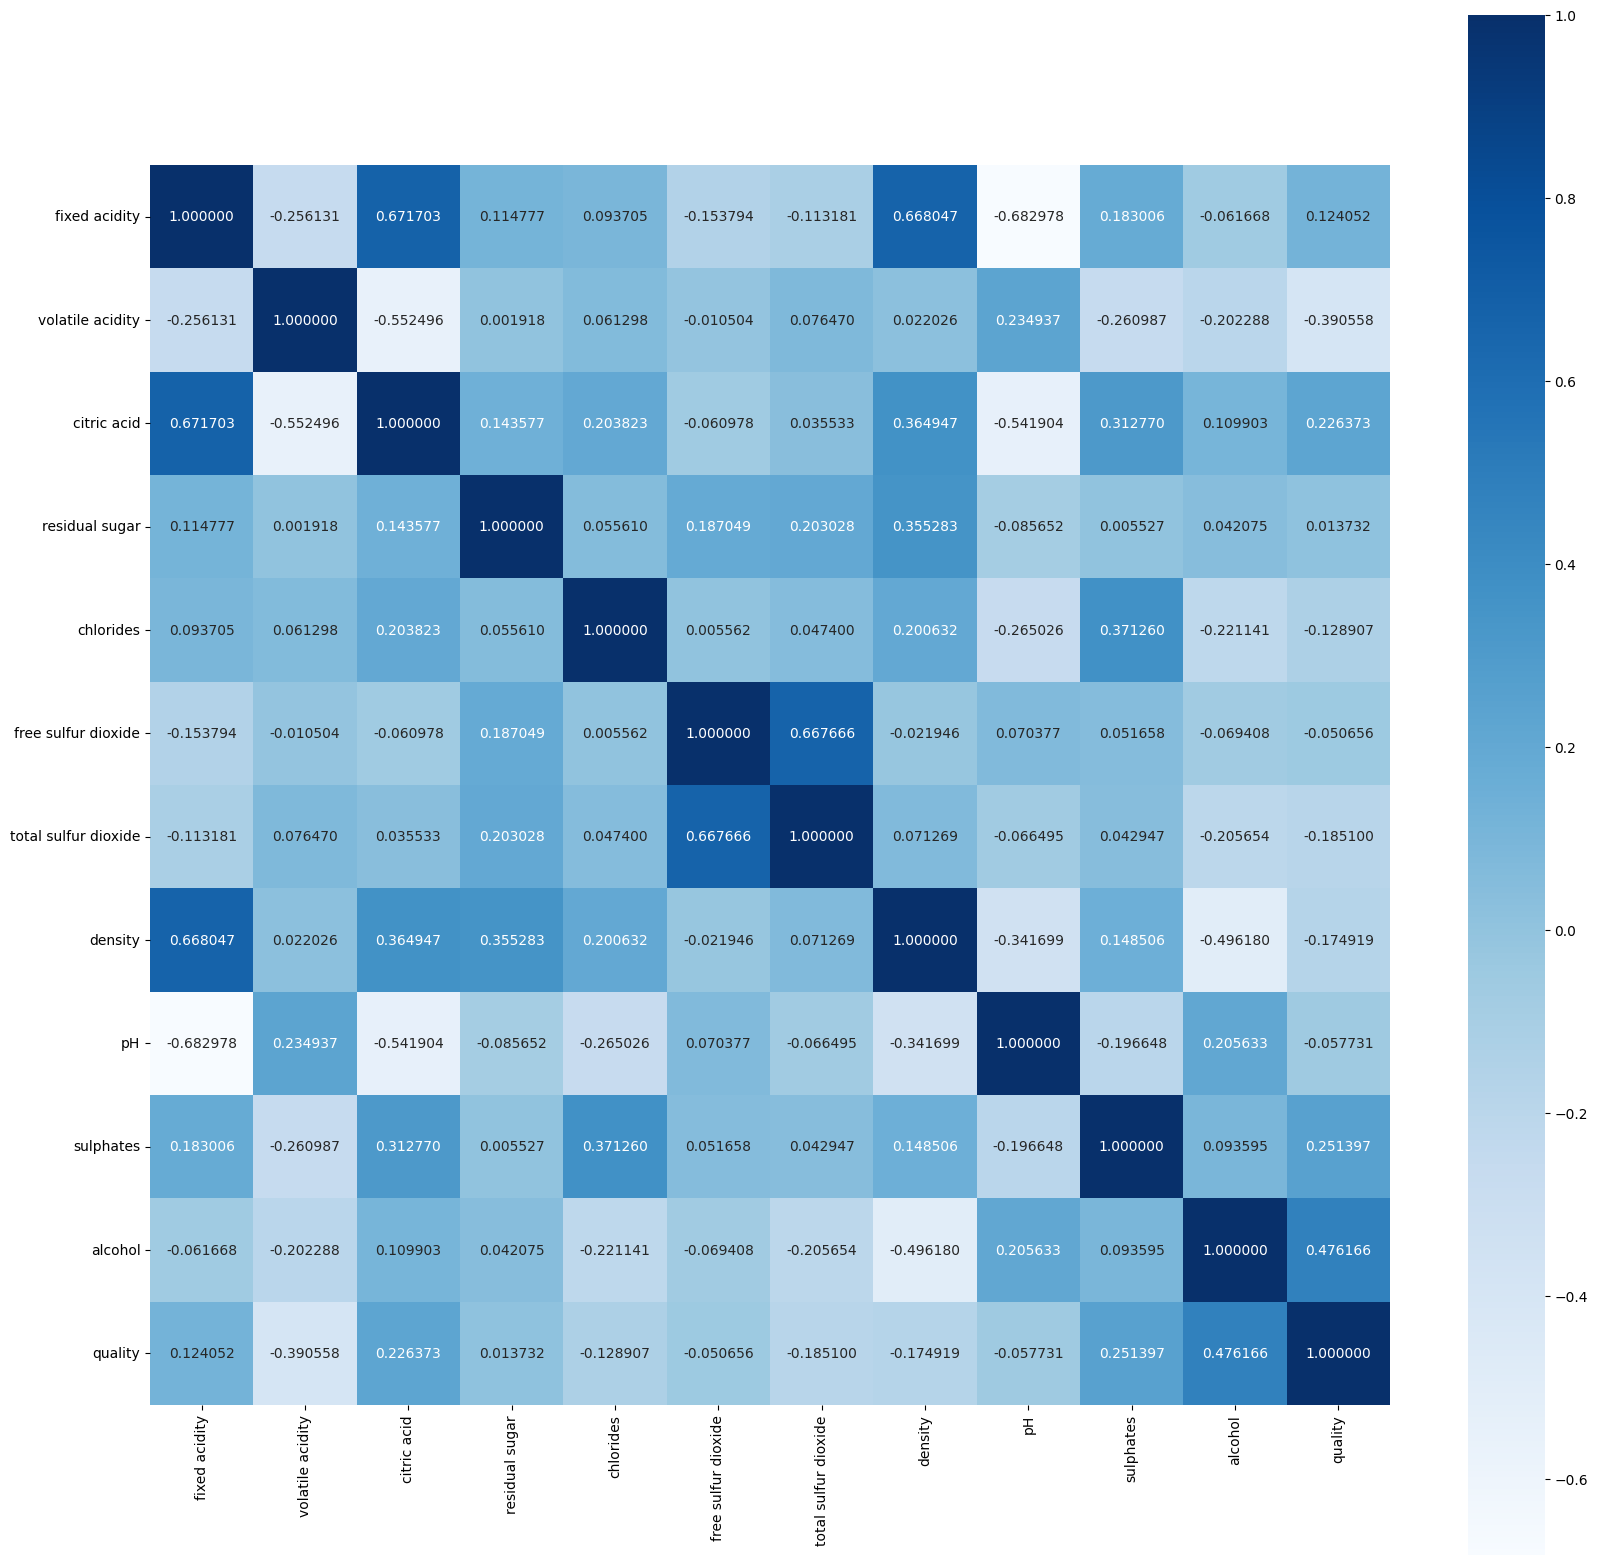

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar= True, fmt='1f', square=True, annot=True, cmap='Blues', annot_kws={'size':10})

<ipython-input-16-ec4b12913d32>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_data['quality'], color='blue')


<Axes: xlabel='quality', ylabel='Density'>

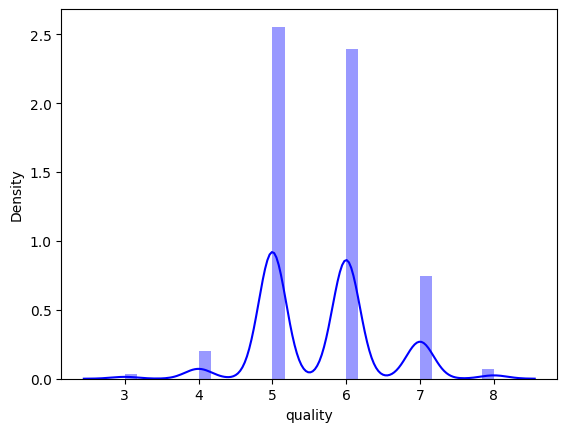

In [16]:
# check the distribution of 'quality'
sns.distplot(wine_data['quality'], color='blue')

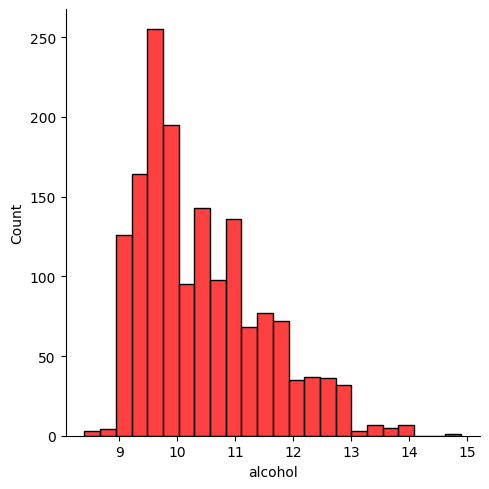

In [32]:
#  check distribution of alcohol
sns.displot(wine_data['alcohol'],color='red')

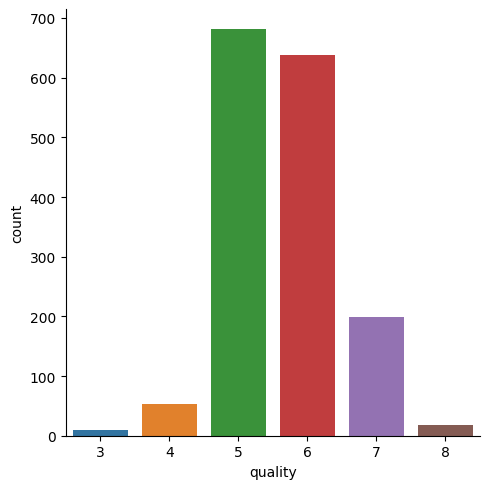

In [34]:
# number of values for each 'quality'
sns.catplot(x='quality', data=wine_data, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

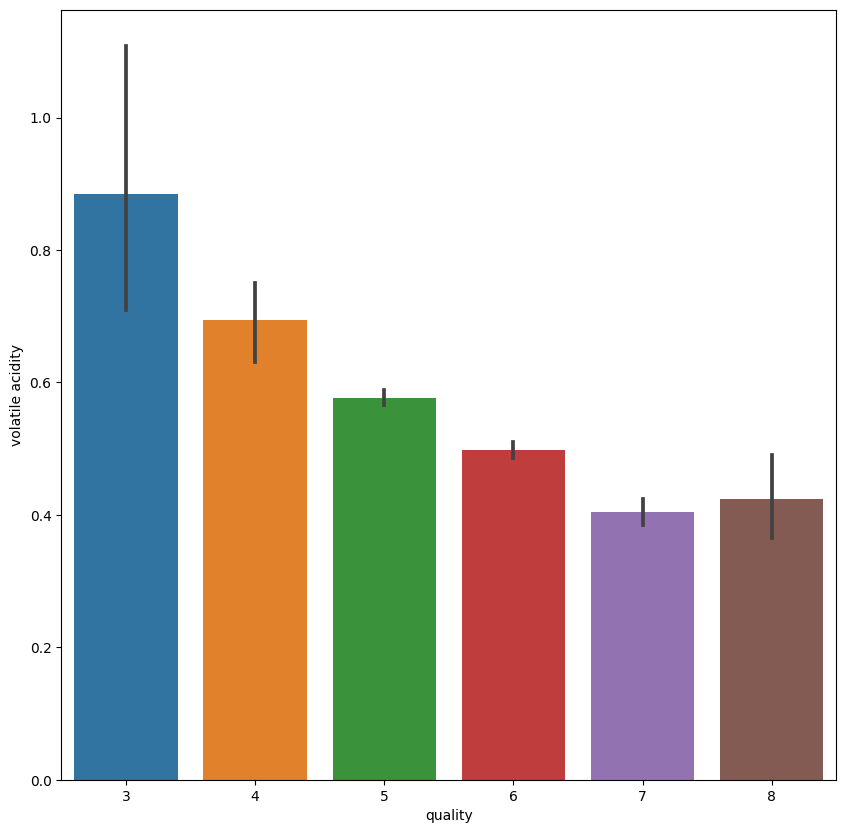

In [37]:
# volatile acidity vs quality
plot = plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='volatile acidity', data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

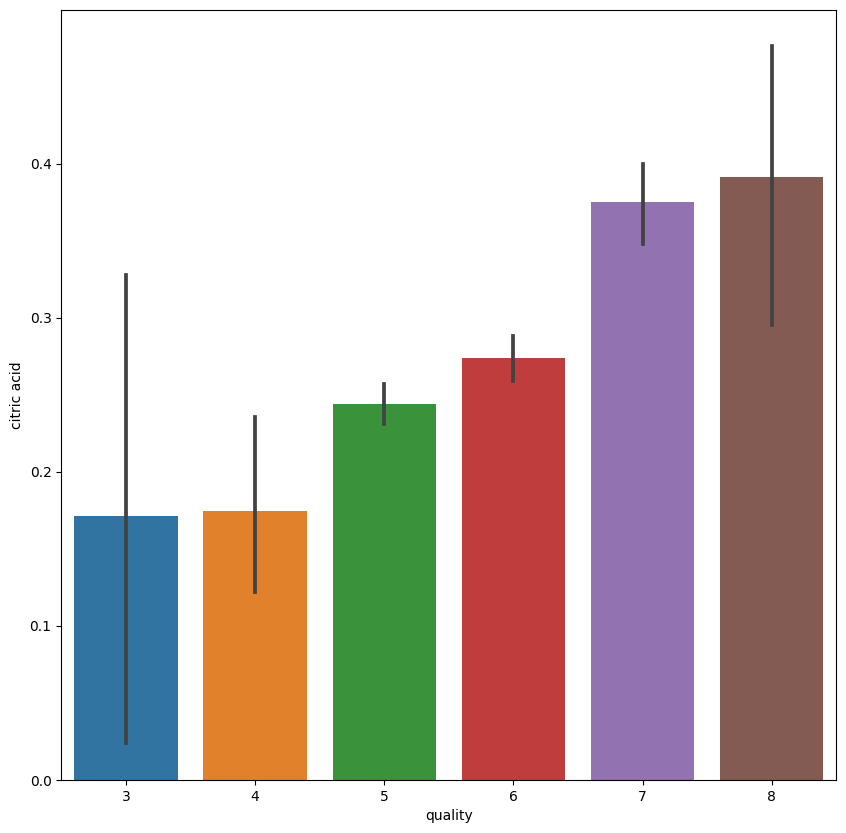

In [42]:
# citric acid vs quality
plot = plt.figure(figsize=(10,10))
sns.barplot(y='citric acid', x='quality', data=wine_data)

# ***Splitting data into target & features, train and test datasets***

In [52]:
x = wine_data.drop(['quality'], axis=1)
y= wine_data['quality']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [54]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1199, 11) (400, 11) (1199,) (400,)


# Training the model

In [55]:
model = RandomForestRegressor()

In [56]:
model.fit(x_train, y_train)

RandomForestRegressor()

# **Model Evaluation**

In [57]:
prediction = model.predict(x_train)
#  R squared error
score = m.r2_score(y_train, prediction)
# Mean absolute square error
score1 = m.mean_absolute_error(y_train, prediction)

print(f"R squared error on training data is {score}")
print(f"The Mean Absolute error on training data is {score1}")

R squared error on training data is 0.9301217812442482
The Mean Absolute error on training data is 0.15701417848206836


In [58]:
prediction2 = model.predict(x_test)
# R squared error
score2 = m.r2_score(y_test, prediction2)
# Mean absolute square error
score3 = m.mean_absolute_error(y_test, prediction2)

print(f"R squared error on test data is {score2}")
print(f"The Mean Absolute error on test data is {score3}")

R squared error on test data is 0.4217921894652884
The Mean Absolute error on test data is 0.43184999999999996
